(0.4, 0.9)

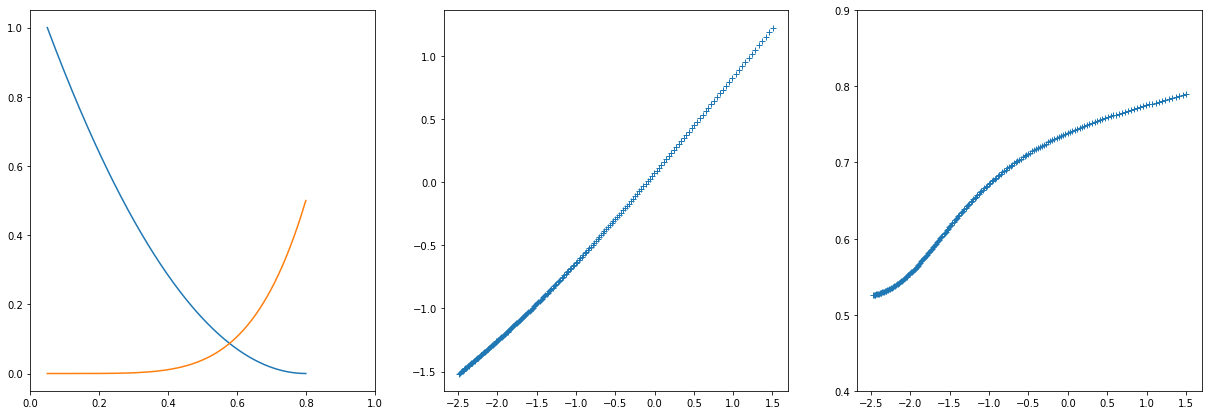

In [34]:
import numpy as np
import matplotlib.pyplot as plt


def krw_Corey(Sw, n, Swi, Sor, Kr0):
    Swn = (Sw - Swi) / (1 - Swi - Sor)
    return Kr0*Swn**n

def kro_Corey(Sw, n, Swi, Sor, Kr0):
    Swn = (Sw - Swi) / (1 - Swi - Sor)
    return Kr0*(1-Swn)**n

def krw_LET(Sw, L, E, T, Swi, Sor, Kr0):
    #Sw = np.linspace(0,1,200)
    Swn = (Sw - Swi) / (1 - Swi - Sor)
    return (Kr0*Swn**L) / (Swn**L + E*(1-Swn)**T)

def kro_LET(Sw, L, E, T, Swi, Sor, Kr0):
    #Swn = (1 - Sw - Sor) / (1 - Swi - Sor)
    Swn = (Sw - Swi) / (1 - Swi - Sor)
    return (Kr0*(1-Swn)**L) / ((1-Swn)**L + E*Swn**T)



visc_water = 1
visc_oil = 1

corey_exp_water = 5
corey_exp_oil = 2

Sorw = 0.2
Swi = 0.05
kr0_water = 0.5
kr0_oil = 1

sw = np.linspace(0.7, 0.1, 200)
sw2 = np.linspace(1-Sorw, Swi, 200)


v_p = (krw_Corey(sw, corey_exp_water, Swi, Sorw, kr0_water)/visc_water + 
       kro_Corey(sw, corey_exp_oil, Swi, Sorw, kr0_oil)/visc_oil)
dv_p = np.diff(v_p)/np.diff(sw)

v_m = (sw[:-1] / visc_water * (np.diff(krw_Corey(sw, corey_exp_water, Swi, Sorw, kr0_water) / sw) / np.diff(sw)) + 
        (1-sw[:-1]) / visc_oil * (np.diff(kro_Corey(sw, corey_exp_oil, Swi, Sorw, kr0_oil) / (1-sw)) / np.diff(sw)))

dv_m = np.diff(v_m)/np.diff(dv_p)


plt.figure(figsize=(21,7))
plt.subplot(131)
plt.plot(sw2, kro_Corey(sw2, corey_exp_oil, Swi, Sorw, kr0_oil))
plt.plot(sw2, krw_Corey(sw2, corey_exp_water, Swi, Sorw, kr0_water))
plt.xlim(0,1)

plt.subplot(132)
plt.plot(dv_p, v_m, '+')

plt.subplot(133)
plt.plot(dv_p[:-1], dv_m, '+')
plt.ylim(0.4,0.9)
